In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
(training_images, training_labels), train_info = tfds.load(name='malaria', split='train[:80%]', batch_size=-1, with_info=True, as_supervised=True)
(validation_images, validation_labels), validation_info = tfds.load(name='malaria', split='train[80%:90%]', batch_size=-1, with_info=True, as_supervised=True)
(test_images, test_labels), test_info = tfds.load(name='malaria', split='train[90%:]', batch_size=-1, with_info=True, as_supervised=True)

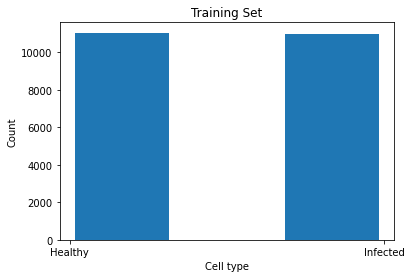

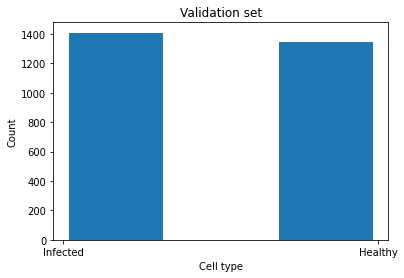

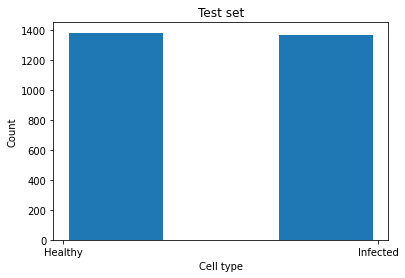

In [16]:
classes = {0: 'Infected', 1: 'Healthy'}

plt.hist(list(map(lambda x: classes[x] , training_labels.numpy())), bins=3, rwidth=0.9)
plt.title('Training Set')
plt.ylabel('Count')
plt.xlabel('Cell type')
plt.show()

plt.hist(list(map(lambda x: classes[x] , validation_labels.numpy())), bins=3, rwidth=0.9)
plt.title('Validation set')
plt.ylabel('Count')
plt.xlabel('Cell type')
plt.show()

plt.hist(list(map(lambda x: classes[x] , test_labels.numpy())), bins=3, rwidth=0.9)
plt.title('Test set')
plt.ylabel('Count')
plt.xlabel('Cell type')
plt.show()

In [5]:
classes = {
    0: 'Infected',
    1: 'Healthy'
}

In [108]:
## HYPERPARAMETERS

BATCH_SIZE = 16
EPOCHS = 5

LR = 0.001

LOSS = 'binary_crossentropy'
OPTIMIZER = keras.optimizers.Adam(learning_rate=LR)

HEIGHT = 300
WIDTH = 300

In [109]:
model = keras.models.Sequential([
    keras.layers.Resizing(input_shape=(None, None, 3), height=HEIGHT, width=WIDTH ),

    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(64, kernel_size=(7, 7), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(64, kernel_size=(7, 7), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [110]:
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_23 (Resizing)      (None, 300, 300, 3)       0         
                                                                 
 conv2d_92 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 69, 69, 32)      

In [112]:
history = model.fit(training_images, training_labels, epochs=EPOCHS, validation_data=(validation_images, validation_labels), batch_size=BATCH_SIZE, shuffle=True)

Epoch 1/5
1378/1378 [==============================] - 168s 121ms/step - loss: 0.5910 - accuracy: 0.6775 - val_loss: 0.4661 - val_accuracy: 0.7888
Epoch 2/5
1378/1378 [==============================] - 166s 121ms/step - loss: 0.1595 - accuracy: 0.9491 - val_loss: 0.2227 - val_accuracy: 0.9351
Epoch 3/5
1378/1378 [==============================] - 166s 121ms/step - loss: 0.1390 - accuracy: 0.9550 - val_loss: 0.2034 - val_accuracy: 0.9376
Epoch 4/5
1378/1378 [==============================] - 167s 121ms/step - loss: 0.1309 - accuracy: 0.9571 - val_loss: 0.1885 - val_accuracy: 0.9427
Epoch 5/5
1378/1378 [==============================] - 166s 121ms/step - loss: 0.1230 - accuracy: 0.9578 - val_loss: 0.1786 - val_accuracy: 0.9434


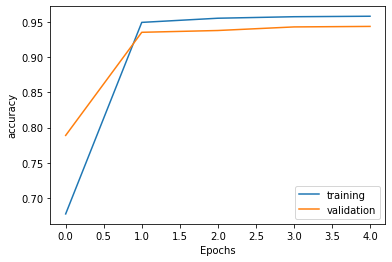

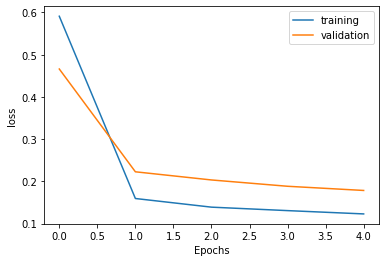

In [116]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend(['training', 'validation'])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [113]:
model.evaluate(test_images, test_labels)

87/87 [==============================] - 9s 89ms/step - loss: 0.2599 - accuracy: 0.9343


[0.2599414587020874, 0.934325098991394]

In [114]:
model.save('../models/malaria_cell_cnn.h5')